# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Putu Bagus Muhammad Fajar
- **Email:** bagusmuhammadfajar16@gmail.com
- **ID Dicoding:** bagusfajar16

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap perentalan sepeda? (Mencari hubungan antara cuaca, humidity, windspeed, temp, dan atemp)
- Apakah hari kerja dan hari libur (termasuk akhir pekan) berpengaruh terhadap perentalan sepeda?
- Bagaimana tren perentalan sepeda berdasarkan bulan?
- Pada jam berapa, tingkat perentalan sepeda naik?

## Import Semua Packages/Library yang Digunakan

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [41]:
day_df = pd.read_csv("https://raw.githubusercontent.com/bagusfajar16/Bike-sharing-dicoding-dataset/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [42]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/bagusfajar16/Bike-sharing-dicoding-dataset/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [43]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [44]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [45]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [47]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [48]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [49]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [50]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [51]:
is_day_hum_min = 0.000000
record_is_day_hum_min = day_df.loc[day_df['hum'] == is_day_hum_min]
print (record_is_day_hum_min)

    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
68       69  2011-03-10       1   0     3        0        4           1   

    weathersit      temp     atemp  hum  windspeed  casual  registered  cnt  
68           3  0.389091  0.385668  0.0   0.261877      46         577  623  


In [52]:
is_hour_hum_min = 0.000000
record_is_hour_hum_min = hour_df.loc[hour_df['hum'] == is_hour_hum_min]
print (record_is_hour_hum_min)

      instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
1551     1552  2011-03-10       1   0     3   0        0        4           1   
1552     1553  2011-03-10       1   0     3   1        0        4           1   
1553     1554  2011-03-10       1   0     3   2        0        4           1   
1554     1555  2011-03-10       1   0     3   5        0        4           1   
1555     1556  2011-03-10       1   0     3   6        0        4           1   
1556     1557  2011-03-10       1   0     3   7        0        4           1   
1557     1558  2011-03-10       1   0     3   8        0        4           1   
1558     1559  2011-03-10       1   0     3   9        0        4           1   
1559     1560  2011-03-10       1   0     3  10        0        4           1   
1560     1561  2011-03-10       1   0     3  11        0        4           1   
1561     1562  2011-03-10       1   0     3  12        0        4           1   
1562     1563  2011-03-10   

### Cleaning Data

Permasalahan yang terdapat di kedua file csv adalah:
1. Tipe data kolom 'dteday', harusnya date time
2. Kolom 'hum', yang merepresentasikan humidity (kelembapan) tidak boleh bernilai 0.000000, karena tidak masuk akal secara ilmiah

In [53]:
datetime_columns_in_day_table = ["dteday"]

for column in datetime_columns_in_day_table:
  day_df[column] = pd.to_datetime(day_df[column])

In [54]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [55]:
datetime_columns_in_hour_table = ["dteday"]

for column in datetime_columns_in_hour_table:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [56]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Setelah mengubah tipe data 'dteday' pada kedua file csv, data seputar nilai 'hum' yang tidak boleh 0.000000, akan diganti menggunakan metode boundary value, atau nilai batas, yang dihitung dengan nilai Q1, Q3, dan IQR. Boundary value yang akan dipakai adalah batas bawah atau lower boundary.

In [57]:
quantile1 = np.percentile(day_df['hum'], 25)
quantile3 = np.percentile(day_df['hum'], 75)

IQR = quantile3 - quantile1
lower_boundary = quantile1 - 1.5 * IQR

day_df.hum.replace(day_df.hum.min(), lower_boundary, inplace=True)

In [58]:
day_df.hum.min()

0.187917

In [59]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [60]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628174,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.141390,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [61]:
quantile1 = np.percentile(hour_df['hum'], 25)
quantile3 = np.percentile(hour_df['hum'], 75)

IQR = quantile3 - quantile1
lower_boundary = quantile1 - 1.5 * IQR

hour_df.hum.replace(hour_df.hum.min(), lower_boundary, inplace=True)

In [62]:
hour_df.hum.min()

0.029999999999999916

In [63]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [64]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627267,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192809,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.030000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Exploratory Data Analysis (EDA)

### Explore ...

In [65]:
day_df.describe(include='all')

<ipython-input-65-a3f85d0fb009>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628174,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.141390,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Note: Sebelum masuk ke eksplorasi pertanyaan pertama, perlu dipahami jika kolom Weathersit diberi skala sebagai berikut:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Namun, tidak ada skala 4 pada dataset.

Pertanyaan 1: Bagaimana pengaruh cuaca terhadap perentalan sepeda?

In [66]:
day_df.groupby(by='weathersit').agg({
    'temp' : ['mean', 'min', 'max'],
    'atemp' : ['mean', 'min', 'max'],
    'windspeed' : ['mean', 'min', 'max'],
    'hum' : ['mean', 'min', 'max']
})

temp                        atemp                      \
                mean      min       max      mean       min       max   
weathersit                                                              
1           0.511541  0.05913  0.861667  0.488596  0.079070  0.840896   
2           0.470366  0.10750  0.815000  0.452868  0.119337  0.826371   
3           0.433440  0.21750  0.633913  0.413064  0.203600  0.555361   

           windspeed                           hum                      
                mean       min       max      mean       min       max  
weathersit                                                              
1           0.190253  0.022392  0.507463  0.565594  0.187917  0.835833  
2           0.186431  0.047275  0.414800  0.725887  0.407083  0.972500  
3           0.243336  0.097021  0.358200  0.858619  0.204687  0.970417

In [67]:
day_df.groupby(by='weathersit').agg({
    'casual' : ['mean', 'min', 'max'],
    'registered' : ['mean', 'min', 'max'],
    'cnt' : ['mean', 'min', 'max']
})

casual             registered                     cnt       \
                  mean min   max         mean  min   max         mean  min   
weathersit                                                                   
1           964.030238  15  3410  3912.755940  416  6946  4876.786177  431   
2           687.352227   9  3155  3348.510121  491  6844  4035.862348  605   
3           185.476190   2  1264  1617.809524   20  4324  1803.285714   22   

                  
             max  
weathersit        
1           8714  
2           8362  
3           4639

Sebelum masuk ke tahap eksplorasi untuk pertanyaan 2, perlu diperhatikan skala  workingday berikut:
- Bernilai 0 jika hari itu bukan hari kerja
- Bernilai 1 jika hari itu adalah hari kerja

Berikutnya adalah skala holiday:
- Bernilai 0 jika hari itu bukan hari libur
- Bernilai 1 jika hari itu adalah hari libur

Pertanyaan 2: Apakah hari kerja dan hari libur (termasuk akhir pekan) berpengaruh terhadap perentalan sepeda?

In [68]:
day_df.groupby(by='workingday').agg({
    'casual' : ['mean', 'min', 'max'],
    'registered' : ['mean', 'min', 'max'],
    'cnt' : ['mean', 'min', 'max']
})

casual             registered                     cnt       \
                   mean min   max         mean  min   max         mean  min   
workingday                                                                    
0           1371.134199  54  3410  2959.034632  451  5966  4330.168831  605   
1            606.570000   2  2469  3978.250000   20  6946  4584.820000   22   

                  
             max  
workingday        
0           8714  
1           8362

In [69]:
day_df.groupby(by='holiday').agg({
    'casual' : ['mean', 'min', 'max'],
    'registered' : ['mean', 'min', 'max'],
    'cnt' : ['mean', 'min', 'max']
})

casual              registered                     cnt        \
                mean  min   max         mean  min   max         mean   min   
holiday                                                                      
0         841.771831    2  3410  3685.332394   20  6946  4527.104225    22   
1        1064.714286  117  3065  2670.285714  573  5172  3735.000000  1000   

               
          max  
holiday        
0        8714  
1        7403

Pada pertanyaan 3, saya menggunakan teknik analisis tren berdasarkan data bulan. Saya rasa ini adalah teknik lanjutan, karena pada instruksi proyek akhir, hanya dijelaskan 3 teknik secara eksplisit yaitu RFM, Geonalysis, dan Clustering. Jadi saya menafsirkan kata "dll" salah satunya adalah analisis tren.

Pertanyaan 3: Bagaimana tren perentalan sepeda berdasarkan bulan?

In [70]:
day_df.groupby(by='mnth').agg({
    'casual' : ['mean', 'min', 'max'],
    'registered' : ['mean', 'min', 'max'],
    'cnt' : ['mean', 'min', 'max']
})

casual              registered                      cnt            
             mean  min   max         mean   min   max         mean   min   max
mnth                                                                          
1      194.225806    9  1070  1982.112903   416  4185  2176.338710   431  4521
2      262.508772   47  1435  2392.789474   905  4546  2655.298246  1005  5062
3      716.838710   46  3155  2975.419355   491  5893  3692.258065   605  8362
4     1013.366667  120  3252  3471.533333   674  5950  4484.900000   795  7460
5     1214.274194  255  3410  4135.500000  2213  6433  5349.774194  2633  8294
6     1231.766667  477  2963  4540.600000  2993  6456  5772.366667  3767  8120
7     1260.596774  562  3065  4303.080645  2298  6790  5563.677419  3285  8173
8     1161.919355  226  2827  4502.500000   889  6541  5664.419355  1115  7865
9     1172.050000  118  3160  4594.466667  1689  6946  5766.516667  1842  8714
10     963.870968    2  3031  4235.354839    20  6911  5199.225806    22  8156
11     610.050000   69  2290  3637.133333   935  5520  4247.183333  1495  6852
12     349.887097    9  1153  3053.919355   432  6055  3403.806452   441  6606

In [71]:
day_df.groupby(by='mnth').agg({
    'temp' : ['mean', 'min', 'max'],
    'atemp' : ['mean', 'min', 'max'],
    'windspeed' : ['mean', 'min', 'max'],
    'hum' : ['mean', 'min', 'max']
})

temp                         atemp                     windspeed  \
          mean       min       max      mean       min       max      mean   
mnth                                                                         
1     0.236444  0.059130  0.425000  0.239796  0.079070  0.415383  0.206303   
2     0.299226  0.127500  0.521667  0.299731  0.101658  0.511983  0.215684   
3     0.390539  0.198333  0.601667  0.381954  0.200133  0.570067  0.222699   
4     0.469999  0.300000  0.664167  0.457081  0.283454  0.614925  0.234482   
5     0.594798  0.414167  0.775000  0.565662  0.404650  0.725383  0.182989   
6     0.684097  0.540833  0.834167  0.638246  0.525892  0.786613  0.185420   
7     0.755470  0.595833  0.861667  0.704094  0.549912  0.840896  0.166059   
8     0.708582  0.635833  0.793333  0.651475  0.242400  0.751267  0.172918   
9     0.616485  0.469167  0.753333  0.579299  0.461475  0.708983  0.165945   
10    0.485012  0.254167  0.657500  0.471973  0.227913  0.607975  0.175205   
11    0.369220  0.245833  0.530000  0.367359  0.248742  0.524612  0.183801   
12    0.324031  0.215833  0.475833  0.326160  0.220333  0.469054  0.176609   

                               hum                      
           min       max      mean       min       max  
mnth                                                    
1     0.073396  0.415429  0.585828  0.311250  0.911250  
2     0.045408  0.507463  0.567465  0.187917  0.929167  
3     0.089558  0.441563  0.591776  0.204687  0.948261  
4     0.065929  0.388067  0.588063  0.254167  0.888333  
5     0.074637  0.342667  0.688958  0.360417  0.922500  
6     0.077125  0.347642  0.575806  0.305000  0.833333  
7     0.080850  0.284813  0.597876  0.396250  0.865417  
8     0.070283  0.375617  0.637730  0.415000  0.850000  
9     0.050379  0.357587  0.714714  0.467083  0.972500  
10    0.022392  0.422275  0.693761  0.463333  0.906250  
11    0.046650  0.376871  0.624876  0.333478  0.962500  
12    0.047275  0.407346  0.666041  0.441250  0.970417

Pertanyaan 4: Pada jam berapa, tingkat perentalan sepeda naik?

In [72]:
hour_df.groupby(by='hr').agg({
    'casual' : ['mean', 'min', 'max'],
    'registered' : ['mean', 'min', 'max'],
    'cnt' : ['mean', 'min', 'max']
})

casual           registered                  cnt         
         mean min  max        mean min  max        mean min  max
hr                                                              
0   10.158402   0   68   43.739669   0  234   53.898072   2  283
1    6.504144   0   49   26.871547   0  139   33.375691   1  168
2    4.772028   0   44   18.097902   0  104   22.869930   1  132
3    2.715925   0   26    9.011478   0   61   11.727403   1   79
4    1.253945   0   13    5.098996   0   22    6.352941   1   28
5    1.411437   0   16   18.478382   0   64   19.889819   1   66
6    4.161379   0   19   71.882759   0  203   76.044138   1  213
7   11.055021   0   40  201.009629   1  572  212.064649   1  596
8   21.679505   0   69  337.331499   4  808  359.011004   5  839
9   30.891334   0  142  188.418157   6  399  219.309491  14  426
10  46.477304   0  209  127.191197   8  351  173.668501   8  539
11  59.540578   0  268  148.602476   5  446  208.143054  10  663
12  68.293956   0  362  185.021978   3  526  253.315934   3  776
13  72.308642   0  355  181.352538   9  491  253.661180  11  760
14  75.567901   0  361  165.381344  12  502  240.949246  12  750
15  74.905350   0  357  176.327846   4  456  251.233196   7  750
16  73.745205   0  367  238.238356   8  481  311.983562  11  783
17  74.273973   0  347  387.178082  14  885  461.452055  15  976
18  61.120879   0  266  364.390110  20  886  425.510989  23  977
19  48.770604   0  230  262.752747  11  662  311.523352  11  743
20  36.233516   0  237  189.796703   8  461  226.030220  11  567
21  28.255495   0  222  144.059066   6  362  172.314560   6  584
22  22.252747   0  175  109.082418   5  327  131.335165   9  502
23  15.199176   0   71   72.631868   2  220   87.831044   2  256

## Visualization & Explanatory Analysis

### Pertanyaan 1:

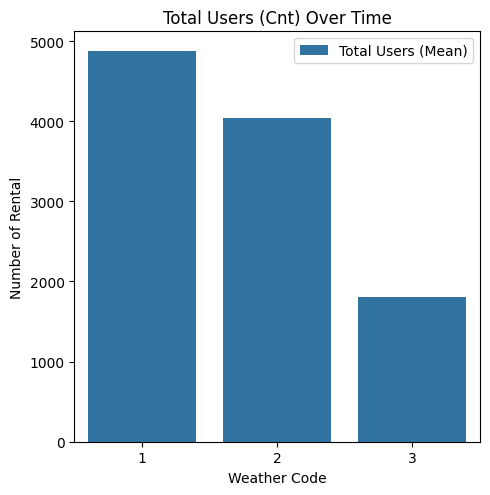

In [73]:
weather_impact = day_df.groupby(by='weathersit').agg({
    'casual' : ['mean', 'min', 'max'],
    'registered' : ['mean', 'min', 'max'],
    'cnt' : ['mean', 'min', 'max']
})

# Plotting
plt.figure(figsize=(5, 14))

# Plot untuk Total Users (Cnt)
plt.subplot(3, 1, 1)
sns.barplot(x=weather_impact.index, y=weather_impact['cnt']['mean'], label='Total Users (Mean)')
plt.title('Total Users (Cnt) Over Time')
plt.xlabel('Weather Code')
plt.ylabel('Number of Rental')
plt.legend()

# Layout grafik
plt.tight_layout()
plt.show()

### Pertanyaan 2:

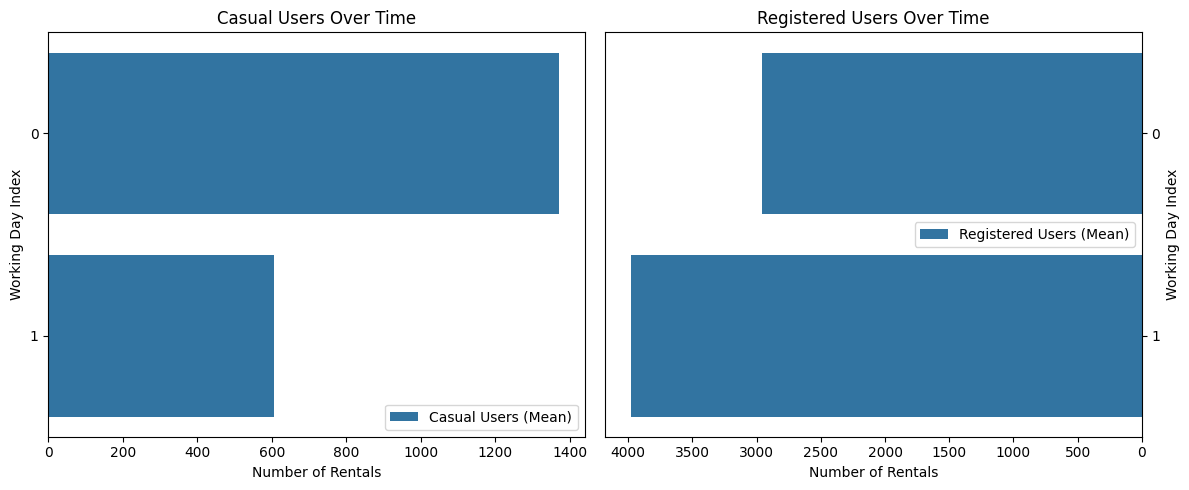

In [74]:
working_day_impact = day_df.groupby(by='workingday').agg({
    'casual' : ['mean', 'min', 'max'],
    'registered' : ['mean', 'min', 'max'],
    'cnt' : ['mean', 'min', 'max']
})

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot pertama (Casual Users)
sns.barplot(x=working_day_impact['casual']['mean'], y=working_day_impact.index, ax=axes[0], label='Casual Users (Mean)', orient='h')
axes[0].set_title('Casual Users Over Time')
axes[0].set_xlabel('Number of Rentals')
axes[0].set_ylabel('Working Day Index')
axes[0].legend()

# Plot kedua (Registered Users)
sns.barplot(x=working_day_impact['registered']['mean'], y=working_day_impact.index, ax=axes[1], label='Registered Users (Mean)', orient='h')
axes[1].set_title('Registered Users Over Time')
axes[1].set_xlabel('Number of Rentals')
axes[1].set_ylabel('Working Day Index')
axes[1].invert_xaxis()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend()

# Layout grafik
plt.tight_layout()
plt.show()

### Pertanyaan 3:

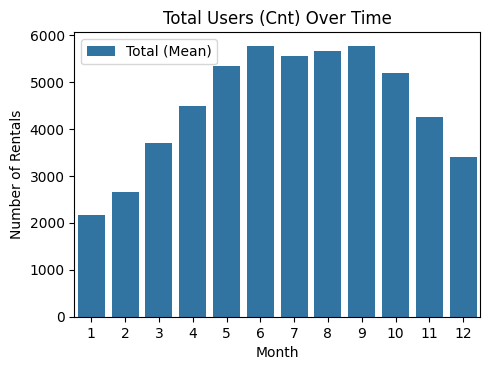

In [75]:
month_impact = day_df.groupby(by='mnth').agg({
    'casual': ['mean', 'min', 'max'],
    'registered': ['mean', 'min', 'max'],
    'cnt': ['mean', 'min', 'max']
})

# Plotting
plt.figure(figsize=(5, 10))

# Plot untuk Total Users (Cnt)
plt.subplot(3, 1, 2)
sns.barplot(x=month_impact.index, y=month_impact['cnt']['mean'], label='Total (Mean)')
plt.title('Total Users (Cnt) Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.legend()

# Layout grafik
plt.tight_layout()
plt.show()

### Pertanyaan 4

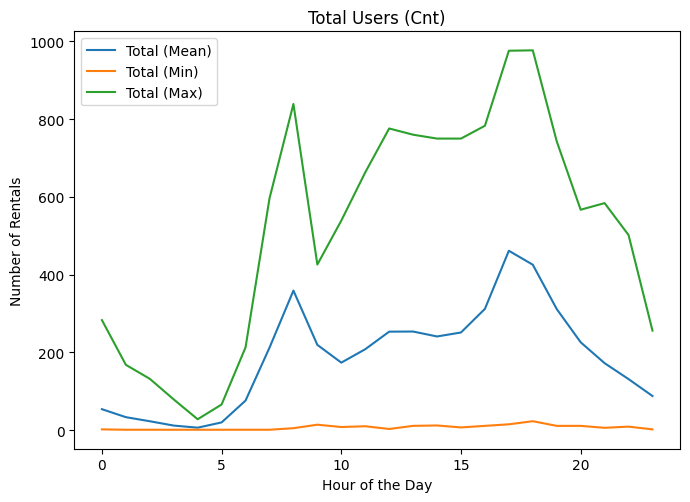

In [76]:
agg_result = hour_df.groupby(by='hr').agg({
    'casual': ['mean', 'min', 'max'],
    'registered': ['mean', 'min', 'max'],
    'cnt': ['mean', 'min', 'max']
})

plt.figure(figsize=(7, 14))

# Plot untuk Total Users (Cnt)
plt.subplot(3, 1, 3)
sns.lineplot(data=agg_result['cnt']['mean'], label='Total (Mean)')
sns.lineplot(data=agg_result['cnt']['min'], label='Total (Min)')
sns.lineplot(data=agg_result['cnt']['max'], label='Total (Max)')
plt.title('Total Users (Cnt)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.legend()

# Layout grafik
plt.tight_layout()
plt.show()

## Conclusion

- Conclusion pertanyaan 1:
Bagaimana pengaruh cuaca terhadap perentalan sepeda?

Sesuai dengan kode index cuaca yang telah disampaikan yaitu:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Diketahui jika tak ada satupun user yang merental sepeda di index ke-4, baik casual maupun registered. Dan User, sebagian besar lebih suka merental di index cuaca 1, diikuti 2, dan terakhir 3, baik secara casual maupun registered. Kondisi indeks cuaca ini juga dipengaruhi oleh temp dan atemp (suhu yang dinormalisasi), humidity (kelembapan), dan windspeed (kecepatan angin) yang nampaknya berpengaruh pada kenyamanan manusia ketika bersepeda.

- Conclusion pertanyaan 2:
Apakah hari kerja dan hari libur (termasuk akhir pekan) berpengaruh terhadap perentalan sepeda?

Cukup berpengaruh. Jika melihat data di atas, maka dapat diketahui jika sebagian besar orang akan memilih untuk mendaftar (registered) terlebih dahulu agar dapat menggunakan sepeda jika mereka ada di working day atau hari kerja. Sebaliknya, jika mereka saat itu sedang libur, maka mereka lebih memilih untuk langsung merental sepeda tanpa mendaftar (registered) sehingga termasuk kategori casual.

- Conclusion pertanyaan 3:
Bagaimana tren perentalan sepeda berdasarkan bulan?

Tren penyewaan sepeda selalu meningkat di pertengahan tahun, mulai dari sekitar akhir musim semi, musim panas, dan awal musim gugur.

- Conclusion pertanyaan 4:
Pada jam berapa, tingkat perentalan sepeda naik?

Jam perentalan meningkat di kisaran waktu pagi hari pada interval jam 5 pagi hingga jam 10 pagi dan meningkat lagi di waktu sore sampai malam, yaitu di rentang jam 3 sore hingga jam 8 malam.

In [77]:
day_df.to_csv("day_data.csv", index=False)

In [78]:
hour_df.to_csv("hour_data.csv", index=False)